![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [5]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

In [6]:
bikes.groupby('season').total.min()

season
1    1
2    1
3    1
4    1
Name: total, dtype: int64

In [7]:
bikes.groupby('season').total.max()

season
1    801
2    873
3    977
4    948
Name: total, dtype: int64

In [8]:
bikes.groupby('hour').total.min()

hour
0      2
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      8
9     14
10    17
11    10
12     3
13    11
14    12
15     7
16    11
17    15
18    23
19    11
20    11
21     6
22     9
23     4
Name: total, dtype: int64

In [9]:
bikes.groupby('hour').total.max()

hour
0     283
1     168
2     119
3      66
4      28
5      57
6     213
7     596
8     839
9     414
10    539
11    647
12    757
13    729
14    730
15    724
16    783
17    970
18    977
19    743
20    551
21    584
22    502
23    256
Name: total, dtype: int64


**Season:** Se observa que el número promedio de bicicletas rentadas es mayor en estaciones cálidas (Verano:3 y Primavera:2) en comparación con estaciones más frías (Invierno:1, Otoño:4), lo que no es un resultado sorprendente ya que se espera que la demanda del público por este medio de transporte sea elevada cuando las condiciones climaticas se consideran favorables para la actividad física (temperatura cálida, pocas probabilidades de lluvia o nieve, etc.).

Por otro lado, es interesante destacar que no se observa ninguna estación con un numero nulo de bicicletas rentadas (en las 4 estaciones hay al menos un usuario rentando bicicletas) lo que deja claro que esta alternativa de transporte siempre es percibida por el público cómo una solucion de movilidad.

Finalmente al observar los números maximos de bicicletas rentadas por estación, una vez más el verano se posiciona cómo la estación con más demanda, sin embargo, se encuentra que el numero máximo de bicicletas en otoño supera a la primavera, lo que se puede interpretar cómo un indicador de que el comportamiento del público no está influenciado completamente por las condiciones climáticas, y tal vez existen más determinantes al momento de tomar esta decisión.



**Hour:**  Al observar el comportamiento de la renta de bicicletas en cada hora del día, se encuentra un promedio máximo en el intervalo (17-18) que se puede atribuir al movimiento de personas esperado durante este momento del día en cualquier ciudad densamente poblada del mundo (fin de jornadas laborales y academicas, desplazamiento hacia zonas residenciales, inicio de turnos nocturnos, etc.) estas situaciones pueden llevar a los usuarios a desistir del uso del transporte publico o del automovil al momento de transportarse.

Por otro lado, se puede encontrar un promedio mínimo en el intervalo (3-4), que tambien puede ser explicado desde una perspectiva de movilidad en las ciudades, este es un horario con muy poca actividad economica o cultural por lo que no se espera una demanda elevada por esta alternativa de transporte, por el contrario, la percepción de inseguridad que da este horario hace que la bicicleta no sea una opción insteresante.

Estos comportamientos tambien son percibidos al realizar un análisis de los numeros máximo y minimo de biciletas rentadas por hora, siendo el intervalo (17-18) el que mayor demanda genera.



### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: xlabel='hour'>

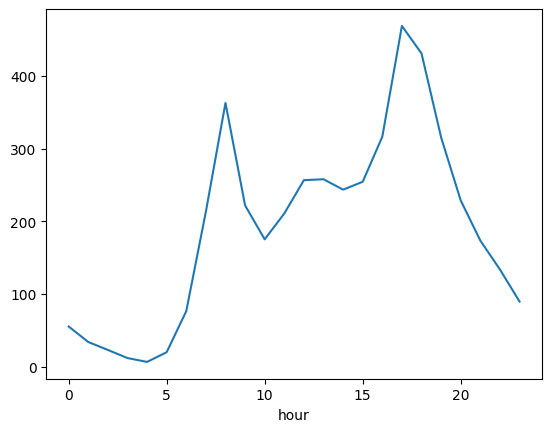

In [10]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

<Axes: xlabel='hour'>

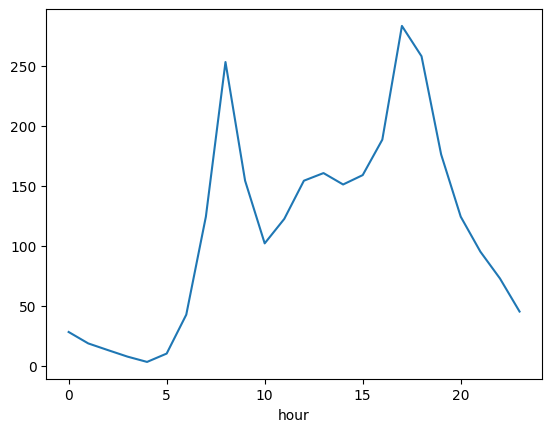

In [11]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos
s_1 = bikes.loc[bikes.season == 1]
s_1.groupby('hour').total.mean().plot()

<Axes: xlabel='hour'>

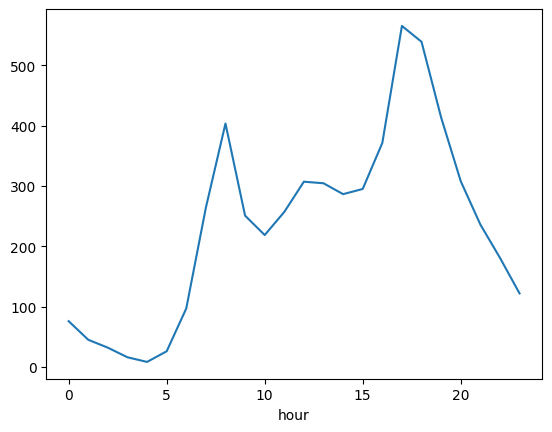

In [12]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos
s_3 = bikes.loc[bikes.season == 3]
s_3.groupby('hour').total.mean().plot()

Al analizar las gráficas se observan comportamientos muy similares (prácticamente identicos) en ambas estaciones (Invierno - Verano), lo que puede favorecer la hipotesis de que las condiciones climaticas no influyen definitivamente en el comportamiento de los usuarios de este medio de transporte.

El periodo 0-4 AM tiene la menor demanda de bicicletas (coincide con el intervalo con menor actividad economica de un día promedio), luego a partír de las 5 AM hasta las 8 AM se observa un incremento sostenido de rentas (inicio de actividades laborales y academicas, alta demanda de transporte).

El periodo 9 AM a 14 PM muestra una reducción en los niveles de rentas de bicletas de las primeras horas de la mañana (reducción en demanda de transporte, menos usuarios movilizandose en la ciudad), en el periodo 15 PM hasta las 18 PM se encuentran los mayores numeros de bicicletas rentadas (con el pico máximo a las 17 PM), coincidiendo con un horario con alta demanda por transporte y con problemas de trafico vehicular.

Finalmente luego de las 18PM se observa una caida constante y sostenida en los numeros de rentas hasta el final del día.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [13]:
# Celda 3
from sklearn.model_selection import train_test_split
y = bikes["total"].to_numpy()
Var = bikes[["season", "hour"]]
Var["season"] = pd.factorize(Var.season)[0]
X = Var.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
regr = LinearRegression()
regr.fit(X_train, y_train)
pd.DataFrame(zip(Var.columns, regr.coef_))

,0,1
0,season,25.914419
1,hour,10.521569


El coeficiente del predictor "season" indica que un aumento en una unidad en la variable implicaría un aumento de 26.59 en el total de bicicletas rentadas; sin embargo, al tratarse de una variable categorica esta no es una interpretación válida, lo que muestra una evidente limitación del modelo de regresión lineal al momento de explicar este problema.

El coeficiente del predictor "hour" indica que un aumento de una unidad en la hora, implicaría un aumento de 10.53 en el total de bicicletas rentadas, sugiriendo que a altas horas de la noche se evidenciarían mayores numeros de rentas, lo que la evidencia previa refuta definitivamente.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [14]:
# Celda 4
X_t = bikes[["season", "hour"]]
Y_t = (bikes.total > 40).astype(int)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_t, Y_t, test_size = 0.2)

def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)

def gini_impurity(X_col, y, split):

    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]

    n_l = y_l.shape[0]
    n_r = y_r.shape[0]

    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)

    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)

    return gini_impurity_

def best_split(X, y, num_pct=10):

    features = range(X.shape[1])

    best_split = [0, 0, 0]  # j, split, gain

    # Para todas las varibles
    for j in features:

        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]

        # Para cada partición
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)

            if gain > best_split[2]:
                best_split = [j, split, gain]

    return best_split

def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):

    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree

    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)

    # Guardar el árbol y estimar la predicción
    y_pred = int(y.mean() >= 0.5)
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace

    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree

    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición

    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)

    return tree

In [15]:
arbol = tree_grow(X_train1, y_train1, level=0, min_gain=0.001, max_depth=2, num_pct=10)
arbol

{'y_pred': 1,
 'y_prob': 0.7557979334098737,
 'level': 0,
 'split': [1, 6.0],
 'n_samples': 8708,
 'gain': 0.20935443854016828,
 'sl': {'y_pred': 0,
  'y_prob': 0.18916394208313872,
  'level': 1,
  'split': [1, 3.0],
  'n_samples': 2139,
  'gain': 0.04711489761838983,
  'sl': {'y_pred': 0,
   'y_prob': 0.3420074349442379,
   'level': 2,
   'split': -1,
   'n_samples': 1074,
   'gain': 0.032400664167388404},
  'sr': {'y_pred': 0,
   'y_prob': 0.03561387066541706,
   'level': 2,
   'split': -1,
   'n_samples': 1065,
   'gain': 0.0010807837904756035}},
 'sr': {'y_pred': 1,
  'y_prob': 0.9403439354740527,
  'level': 1,
  'split': [1, 7.0],
  'n_samples': 6569,
  'gain': 0.012776510403686894,
  'sl': {'y_pred': 1,
   'y_prob': 0.6103542234332425,
   'level': 2,
   'split': -1,
   'n_samples': 365,
   'gain': 0.03080553543320963},
  'sr': {'y_pred': 1,
   'y_prob': 0.9597164034805027,
   'level': 2,
   'split': -1,
   'n_samples': 6204,
   'gain': 0.0028517296339122533}}}

In [16]:
def tree_predict(X, tree, proba=False):

    predicted = np.ones(X.shape[0])

    # Revisar si es el nodo final
    if tree['split'] == -1:
        if not proba:
            predicted = predicted * tree['y_pred']
        else:
            predicted = predicted * tree['y_prob']

    else:

        j, split = tree['split']
        filter_l = (X.iloc[:, j] < split)
        X_l = X.loc[filter_l]
        X_r = X.loc[~filter_l]

        if X_l.shape[0] == 0:  # Si el nodo izquierdo está vacio solo continua con el derecho
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)
        elif X_r.shape[0] == 0:  #  Si el nodo derecho está vacio solo continua con el izquierdo
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
        else:
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)

    return predicted


In [18]:
p3_pred = tree_predict(X_test1, arbol)
MSE_p3 = np.average(np.square(p3_pred-y_test1))
print("El MSE del arbol estiamdo es de:" + str(MSE_p3))

El MSE del arbol estiamdo es de:0.09550045913682277


### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

(0.9172012615965267, 20)

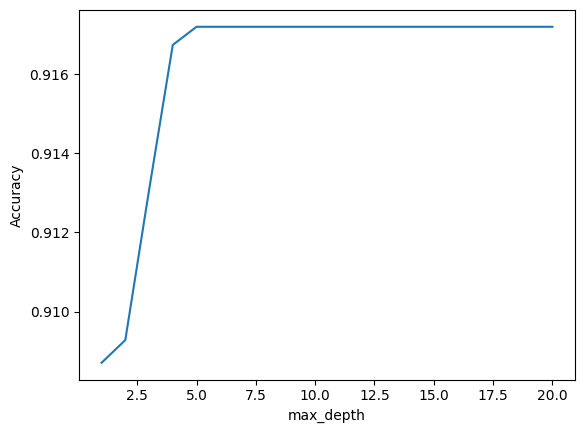

In [20]:
# Celda 5
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

max_depth_range = range(1, 21)
accuracy_scores = []

for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X_train1, y_train1, cv=10, scoring='accuracy').mean())

plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

In [21]:
clf = DecisionTreeClassifier(max_depth=20, random_state=1)
clf.fit(X_train1, y_train1)

DecisionTreeClassifier(max_depth=20, random_state=1)

In [23]:
predictt = clf.predict(X_test1)
MSE=np.average(np.square(predictt-y_test1))
print("El MSE del modelo con libreria es de: "+ str(MSE))

El MSE del modelo con libreria es de: 0.08677685950413223


Al comparar el Error Cuadratico Medio (MSE) de ambos modelos, se observa que el arbol manual tiene un peor desempeño predictivo (mayor error), comparado con el arbol de sklearn.

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [24]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [25]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [26]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

(0.6308888888888888, 2)

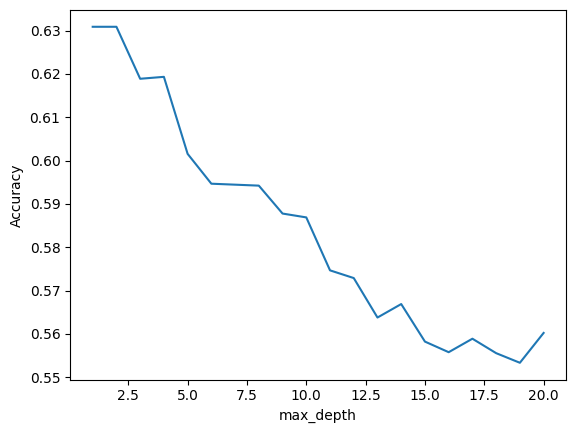

In [27]:
# Celda 6
max_depth_range = range(1, 21)
accuracy_scores = []

for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy').mean())

plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
models = {'lr': LogisticRegression(),
          'dt': DecisionTreeClassifier(max_depth=2, random_state=1)}

for model in models.keys():
    models[model].fit(X_train, y_train)

y_pred = pd.DataFrame(columns=models.keys())
for model in models.keys():
    y_pred[model] = models[model].predict(X_test)

for model in models.keys():
    print(model,accuracy_score(y_test, y_pred[model]),f1_score(y_test, y_pred[model]))

lr 0.6133333333333333 0.6102150537634409
dt 0.6453333333333333 0.6448598130841121


Al comparar el desempeño de los modelos estimados, se encuentra que el arbol de decisión muestra mejores resultados tanto en Accuracy, como en F1-Score comparado con el desempeño encontrado en la regresión logística.

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados.

In [30]:
# Celda 7
from sklearn.ensemble import BaggingRegressor

models_1 = {'lr_100': BaggingRegressor(LogisticRegression(), n_estimators=100, bootstrap=True, oob_score=True, random_state=1),
            'dt_dep_100': BaggingRegressor(DecisionTreeClassifier(max_depth=7, random_state=1), n_estimators=100, bootstrap=True, oob_score=True, random_state=1),
            'dt_leaf_100': BaggingRegressor(DecisionTreeClassifier(min_samples_leaf=20, random_state=1), n_estimators=100, bootstrap=True, oob_score=True, random_state=1)}

for model in models_1.keys():
    models_1[model].fit(X_train, y_train)

y_pred_1 = pd.DataFrame(columns=models_1.keys())
for model in models_1.keys():
    y_pred_1[model] = models_1[model].predict(X_test)

y_pred_1 = y_pred_1.astype(int)

for model in models_1.keys():
    print(model,accuracy_score(y_test, y_pred_1[model]),f1_score(y_test, y_pred_1[model]))

n_estim = 3
y_pred__ = (y_pred_1.sum(axis=1) >= (n_estim / 2)).astype(int)
print(accuracy_score(y_pred__, y_test), f1_score(y_pred__, y_test))

lr_100 0.5853333333333334 0.4918300653594771
dt_dep_100 0.496 0.002638522427440633
dt_leaf_100 0.496 0.0
0.496 0.002638522427440633


Se observa un mejor desempeño en terminos de accuracy y F1-Score utilizando un modelo con 100 regresiones logisticas "LR_100"; mientras que no se observan diferencias sustanciales entre los modelos de árboles de decisión y el método de votación mayoritaria.

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [31]:
# Celda 8

models_2 = {'lr_1': BaggingRegressor(LogisticRegression(), n_estimators=100, bootstrap=True, oob_score=True, random_state=1),
            'dt_dep_1': BaggingRegressor(DecisionTreeClassifier(max_depth=4, random_state=1), n_estimators=100, bootstrap=True, oob_score=True, random_state=1),
            'dt_leaf_1': BaggingRegressor(DecisionTreeClassifier(min_samples_leaf=10, random_state=1), n_estimators=100, bootstrap=True, oob_score=True, random_state=1)}

for model in models_2.keys():
    models_2[model].fit(X_train, y_train)

y_pred_2 = pd.DataFrame(columns=models_2.keys())
for model in models_2.keys():
    y_pred_2[model] = models_2[model].predict(X_test)

y_pred_2 = y_pred_2.astype(int)

for model in models_2.keys():
    print(model,accuracy_score(y_test, y_pred_2[model]),f1_score(y_test, y_pred_2[model]))

err = []
for model in models_2.keys():
  err.append(models_2[model].oob_score_)

err = np.array(err)
alpha = (1 - err) / (1 - err).sum()

y_pond = (np.sum(y_pred_2 * alpha, axis=1) >= 0.5).astype(int)

print(accuracy_score(y_test, y_pond), f1_score(y_test, y_pond))

lr_1 0.5853333333333334 0.4918300653594771
dt_dep_1 0.504 0.04859335038363172
dt_leaf_1 0.496 0.0
0.5046666666666667 0.04865556978233035


Se observa que el modelo con 100 regresiones logisticas "LR_1" presenta los mejores resultados en términos de accuracy y F1-score, en comparación con los modelos de arboles de decisión y las predicciones con votación ponderada.

### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

**Votación mayoritaria:** En términos de accuracy y F1-Score, las predicciones no mostraron diferencias significativas con los modelos de arboles de decisión, en cambio, su desempeño en comparación con las regresiones logisticas fue inferior. Estos resultados pueden estar relacionados con la naturaleza de los datos y podrían dar una perséctiva interesante respecto al comportamiento de la metodología. En este caso la votación mayoritaria no parece ajustarse a la información disponible por lo que otras alternativas deben tomarse en cuenta.


**Votación ponderada:**  Se encuentra una mejora en terminos de accuracy y F1-Score al utilizar una votación ponderada, sin embargo, sus predicciones siguen teniendo un desempeño inferior a las regresiones logisticas, confirmando que este algoritmo parece ajustarse mejor a los datos. En este contexto hay que destacar que la votación ponderada supera el desempeño de los árboles de decisión y permite observar que añadir pesos especificos a las predicciones de los modelos es una práctica útil y poderosa, ya que permite cuantificar la importancia de los modelos de acuerdo a sus errores fuera de la muestra, convirtiendose en una metodología más confiable comparada con la votación mayoritaria.